<a href="https://colab.research.google.com/github/sepety/RL_Otus/blob/main/OTUS_meteo_teory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Аннотация (Abstract)
В данной работе предлагается концепция и архитектура инновационной системы прогнозирования погоды на основе методов обучения с подкреплением (Reinforcement Learning, RL), интегрированных с передовыми моделями генеративного прогноза погоды (GenCast) и локальными измерениями с мобильной метеостанции и почвенных датчиков. Система нацелена на высокоточный и многошаговый прогноз ключевых погодных параметров (температура, влажность, ветер, осадки и пр.) и почвенных показателей для конкретной локации — станицы Вёшенской (Ростовская область, РФ). Предлагаемый подход включает многоступенчатую схему обучения с опорой на исторические данные, открытые прогнозы (Gismeteo, GenCast), а также непрерывную подстройку модели с помощью актуальных данных, получаемых в реальном времени.


II. Введение (Introduction)
Прогнозирование погоды является одной из фундаментальных задач, от которых зависит широкий спектр решений в сельском хозяйстве, логистике, индустрии туризма и множестве других отраслей. Точность традиционных моделей прогноза погоды существенно возросла с появлением больших данных и улучшением физических моделей. Однако, классические численные методы моделирования часто имеют высокую вычислительную стоимость и трудны в адаптации для сверхлокальных условий.
Благодаря прогрессу в области машинного обучения, в частности, появлению генеративных моделей (таких как DeepMind GenCast), и методам обучения с подкреплением (RL), стало возможным строить более точные и оперативные решения для прогнозирования погоды на локальном уровне. В данном проекте мы стремимся объединить:
Данные локальной станции (8 погодных параметров) и почвенных датчиков (4 параметра).
Исторические метеоданные (40-летний объём, шаг 1 час) и данные из соседних (в радиусе 70 км) пунктов наблюдения.
Прогнозы от открытых сервисов (Gismeteo/Росгидрометцентр).
Прогнозы от GenCast — новейшей высокоточной системы от DeepMind, способной давать ансамблевые прогнозы на 15 дней вперёд.
Обучающийся RL-агент будет использовать все вышеперечисленные источники данных на разных стадиях — от начального обучения по историческим данным до уточнения прогноза в режиме реального времени. Интеграция GenCast обеспечит «высокоранговую» точку опоры, служащую эталоном, а локальные датчики позволят непрерывно калибровать прогноз под реальные условия конкретной локации.


III. Описание концепции подхода (Conceptual Approach)
3.1 Общая идея
Сбор данных:
40-летние синтетические исторические данные (шаг 1 час) по 8 параметрам для локации (OpenWeather).
Исторические данные из 20 точек в радиусе 70 км (OpenWeather).
Исторические данные с ближайшей официальной метеостанции (Волгоградская область).
Текущие прогнозные данные с Gismeteo (Росгидрометцентр).
Прогнозы GenCast (по статье DeepMind).
Обучение RL-агента:
Стадия 1: Обучение на исторических данных (ретроспективный анализ).
Стадия 2: Интеграция векторных прогнозов от Gismeteo и GenCast как дополнительных признаков в среде RL.
Стадия 3: Уточнение прогноза на основе текущих данных с метеостанции и почвенных датчиков.
Стадия 4: Многошаговая верификация прогноза (каждый час/день/и т.д.) и дообучение (on-line или off-line).
Интервалы прогноза:
1 час, 3 часа, 12 часов, 1 день, 3 дня, 7 дней, 15 дней.
Выходные данные:
8 основных параметров погоды (температура, влажность, направление ветра и т.д.).
4 параметра почвы (температура, влажность, электропроводность, pH).
Интеграция GenCast:
GenCast предоставляет ансамблевый прогноз с горизонтами до 15 дней.
RL-агент использует этот прогноз как эталонный «high-rank» сигнал, к которому можно подстраиваться для повышения точности.
RL-агент должен научиться комбинировать локальные наблюдения, собственный предиктивный модуль и ансамбль GenCast, определяя оптимальный вес каждому источнику в разные моменты времени.


1. Математическое описание используемых методов
1.1. Постановка задачи в терминах MDP (Markov Decision Process)
Задачу прогнозирования погоды в заданной локации предлагается рассматривать как задачу обучения с подкреплением (Reinforcement Learning, RL), которая формализуется в виде марковского процесса принятия решений (Markov Decision Process, MDP).

Определим основные элементы MDP:

Набор состояний $S$.
Состояние среды в момент времени $t$ содержит:
$s_t=(x_t, p_t, g_t, h_t)$,
где: $x_t$ — вектор локальных наблюдений (температура, влажность, интенсивность осадков, направление ветра и т.д.), полученных от мобильной метеостанции (8 параметров) и датчиков почвы (4 параметра).
$p_t$ — прогноз погоды от Gismeteo на ближайшие временные интервалы (1 ч, 3 ч, 1 д, …).
$g_t$ — статистические характеристики (среднее, дисперсия, минимум, максимум) ансамбля от GenCast, который даёт 15-дневный прогноз.
$h_t$ — исторические данные (последние $k$ временных шагов) для текущей локации и близлежащих 20 локаций в радиусе 70 км.
При необходимости можно включать дополнительные временные признаки (день недели, сезон, час суток и т.д.).
Набор действий $A$.
Действие агента $a_t$ — это вектор прогнозируемых значений для следующего периода на выбранный горизонт (или на несколько горизонтов разом). В базовом варианте:
$a_t=(T^t + \Delta t, H^t + \Delta t, W^t + \Delta t, \dots)$,

где
$T^t + \Delta t$ — предсказанная температура воздуха через $\Delta t$,

$H^t + \Delta t$ — предсказанная влажность и т.д. (для 8 параметров погоды + 4 параметров почвы).

Функция перехода $P(s_{t+1}|s_t, a_t)$.

В классических RL-задачах функция перехода определяет новое состояние среды. Переход для прогноза погоды заключается в «сдвиге» времени и обновлении фактических метеоданных.

𝑠
𝑡
+
1
=
update
(
𝑠
𝑡
,
𝑎
𝑡
,
real_observation
𝑡
+
1
)
,
s
t+1
​
 =update(s
t
​
 ,a
t
​
 ,real_observation
t+1
​
 ),
где
real_observation
𝑡
+
1
real_observation
t+1
​
  — реальные замеры погоды в момент
𝑡
+
1
t+1.

Функция вознаграждения
𝑟
𝑡
=
𝑅
(
𝑠
𝑡
,
𝑎
𝑡
)
r
t
​
 =R(s
t
​
 ,a
t
​
 ).
Ключевым элементом является ошибка прогноза. Мы можем использовать, например, отрицательное среднеквадратичное отклонение (MSE) или отрицательный CRPS (Continuous Ranked Probability Score). Для простоты возьмём MSE:

𝑟
𝑡
=
−
∥

𝑎
𝑡
−
𝑦
𝑡
+
Δ
𝑡
∥
2
,
r
t
​
 =−
​
 a
t
​
 −y
t+Δt
​
  
​
  
2
 ,
где
𝑦
𝑡
+
Δ
𝑡
y
t+Δt
​
  — истинное значение погодных параметров через
Δ
𝑡
Δt. Чем меньше ошибка (MSE), тем больше (менее отрицательное) вознаграждение.

Функция стратегии
𝜋
𝜃
(
𝑎
𝑡
∣
𝑠
𝑡
)
π
θ
​
 (a
t
​
 ∣s
t
​
 ).
Агент имеет стратегию (policy)
𝜋
𝜃
π
θ
​
  с параметрами
𝜃
θ (например, веса нейронной сети). На вход подаётся состояние
𝑠
𝑡
s
t
​
 , на выходе — распределение (или детерминированный вектор) действий
𝑎
𝑡
a
t
​
 . Обучение — это подбор
𝜃
θ для максимизации суммарного вознаграждения во времени.



1.2. Интеграция с прогнозом GenCast (ансамблевый прогноз)
Модель GenCast (см. публикацию DeepMind) генерирует ансамбль из
𝑀
M возможных сценариев. Для каждого параметра погоды
𝑋
X (температура, давление и т.д.) на горизонт
Δ
𝑡
Δt получаем:

𝑋
GenCast
=
{
𝑋
𝑡
+
Δ
𝑡
(
1
)
,
𝑋
𝑡
+
Δ
𝑡
(
2
)
,
…
,
𝑋
𝑡
+
Δ
𝑡
(
𝑀
)
}
.
X
GenCast
​
 ={X
t+Δt
(1)
​
 ,X
t+Δt
(2)
​
 ,…,X
t+Δt
(M)
​
 }.
Чтобы подать это агенту, мы вычисляем статистики (например, среднее
𝜇
𝑋
μ
X
​
 , дисперсию
𝜎
𝑋
2
σ
X
2
​
 , минимум
min
⁡
(
𝑋
)
min(X) и максимум
max
⁡
(
𝑋
)
max(X)) и включаем их в вектор состояния:

𝑔
𝑡
=
[
𝜇
𝑋
,
𝜎
𝑋
2
,
min
⁡
(
𝑋
)
,
max
⁡
(
𝑋
)
]
𝑋
∈
{
параметры погоды
}
.
g
t
​
 =[μ
X
​
 ,σ
X
2
​
 ,min(X),max(X)]
X∈{параметры погоды}
​
 .
Таким образом, агент понимает не только «единый» прогноз, но и «уровень уверенности» (разброс ансамбля).



1.3. Оптимизационная задача
Обучение с подкреплением в данном случае сводится к задаче:

max
⁡
𝜃

𝐸
[
∑
𝑡
=
0
𝑇
𝛾
𝑡

𝑟
𝑡
]
,
θ
max
​
 E[
t=0
∑
T
​
 γ
t
 r
t
​
 ],
где
𝛾
∈
[
0
,
1
)
γ∈[0,1) — коэффициент дисконтирования, а
𝑟
𝑡
r
t
​
  — функция вознаграждения (на основе ошибки прогноза). На практике можно использовать алгоритмы на основе градиента стратегии (Policy Gradient), в частности PPO (Proximal Policy Optimization), SAC (Soft Actor-Critic) и т.д.

2. Псевдокод алгоритма
Ниже приведён обобщённый псевдокод для итеративного обучения нашего RL-агента, который учитывает исторические данные, текущие замеры, а также прогноз GenCast и Gismeteo.

In [ ]:
АЛГОРИТМ: RL-Based Weather Forecasting

ПАРАМЕТРЫ:
  - θ: параметры (веса) нейронной сети (стратегии π_θ)
  - D_historical: исторические данные (40 лет, шаг 1 час)
  - D_genCast: данные/статистика ансамбля GenCast
  - D_gismeteo: прогноз Gismeteo на разные горизонты (1ч, 3ч, 1д, ...), обновляется периодически
  - D_localSensors: локальные сенсоры (метеостанция, почвенные датчики)
  - N: количество эпизодов обучения
  - T: длина эпизода (число временных шагов, например, несколько дней или недель)
  - α: скорость обучения (learning rate)

ИНИЦИАЛИЗАЦИЯ:
  1. θ ← случайные начальные веса стратегии
  2. Инициализировать реплей-буфер (или буфер переходов) B ← ∅

ДЛЯ эпизода от 1 до N:
  1) Сгенерировать начальное состояние s₀, выбрав случайный временной срез в D_historical
  2) ДЛЯ t от 0 до T-1:
      2.1) Построить sₜ = [xₜ, pₜ, gₜ, hₜ]
           где:
             xₜ   = реальные локальные данные с D_localSensors (температура, влажность и т.п.)
             pₜ   = текущий прогноз Gismeteo
             gₜ   = статистика (mean, std, min, max) ансамбля GenCast
             hₜ   = фрагмент исторических данных (контекст)
      2.2) Сэмплировать действие aₜ из стратегии aₜ ~ π_θ(a | sₜ)
      2.3) Получить реальное значение yₜ₊∆ (из D_historical или D_localSensors)
           на шаге t + ∆t (горизонт прогноза)
      2.4) Вычислить награду:
           rₜ = -MSE(aₜ, yₜ₊∆)
      2.5) Сформировать новый переход (sₜ, aₜ, rₜ, sₜ₊₁),
           где sₜ₊₁ = s_{t+1} либо (t+1)-ый шаг или следующее состояние с учётом обновлённых данных
      2.6) Записать (sₜ, aₜ, rₜ, sₜ₊₁) в B (буфер)
      2.7) Перейти к следующему шагу t := t + 1

  3) После завершения эпизода:
      - Произвести обновление параметров θ, используя выбранный алгоритм RL (напр. PPO):
        θ ← θ + α * ∇θ (J(θ)),
        где J(θ) ≈ сумма (discounted) наград, оцененных по данным из B

  4) Очистить/частично очистить буфер B или обновить стратегию сбора следующего эпизода

КОНЕЦ


Комментарии к псевдокоду:

В реальной реализации шаг
𝑡
+
Δ
𝑡
t+Δt может быть, например,
𝑡
+
1
t+1 час,
𝑡
+
1
t+1 день и т.д. в зависимости от интервала прогнозирования.
Если хотим предсказывать сразу несколько горизонтов (1 час, 3 часа, 12 часов, 1 день…), то действие
𝑎
𝑡
a
t
​
  — это вектор прогнозируемых значений на все выбранные горизонты. Тогда награду можно учитывать как сумму (или среднее) ошибок по этим горизонтам.

3. Подробное описание этапов с раскрытием логики
3.1. Сбор и предобработка данных
Исторические данные (
𝐷
ℎ
𝑖
𝑠
𝑡
𝑜
𝑟
𝑖
𝑐
𝑎
𝑙
D
historical
​
 )

Получаем с сервиса OpenWeather 40-летний временной ряд (шаг 1 час), содержащий 8 параметров: температура, влажность, интенсивность осадков, скорость ветра, направление ветра, интенсивность света, УФ-индекс, барометрическое давление.
Важно очистить от пропусков, ошибок (выбросов), нормализовать.
Данные из соседних локаций

Из 20 точек в радиусе 70 км берём аналогичные временные ряды, чтобы уметь отслеживать «движение» погодных систем. Используем в качестве доп. фичей в историческом блоке
ℎ
𝑡
h
t
​
 .
Прогнозы Gismeteo (
𝐷
𝑔
𝑖
𝑠
𝑚
𝑒
𝑡
𝑒
𝑜
D
gismeteo
​
 )

Получаем (парсинг или API) прогнозы на 1, 3, 7, 15 дней вперёд. Эти данные обновляются в режиме реального времени.
Прогнозы GenCast (
𝐷
𝑔
𝑒
𝑛
𝐶
𝑎
𝑠
𝑡
D
genCast
​
 )

Модель GenCast даёт набор ансамблевых прогнозов (по ссылкам DeepMind). Берём агрегированные характеристики (среднее, дисперсия и т.д.) для разных горизонтов (до 15 дней).
Локальная метеостанция и датчики почвы (
𝐷
𝑙
𝑜
𝑐
𝑎
𝑙
𝑆
𝑒
𝑛
𝑠
𝑜
𝑟
𝑠
D
localSensors
​
 )

Устанавливаем мобильную метеостанцию, которая измеряет 8 параметров погоды + почвенный модуль (температура почвы, влажность, электропроводимость, pH).
Данные собираются с некой периодичностью (например, каждые 10–15 минут или час) и передаются в систему.
Логика:

Все источники должны быть синхронизированы по единому временному штампу (UTC).
Используем процедуры сглаживания (rolling window), фильтрации выбросов.
Возможно, отдельные интервалы пропущенных данных восполняем интерполяцией или отбрасываем (в зависимости от стратегии).

3.2. Формирование окружения (RL-среды)
Состояние
𝑠
𝑡
s
t
​


Собирается из:
𝑥
𝑡
x
t
​
  — текущие измерения (вектор размером 8 + 4=12 для погоды + почвы),
𝑝
𝑡
p
t
​
  — прогноз от Gismeteo, который может содержать по 8 параметров для нескольких горизонтов (суммарный размер может быть 8
×
× 4 = 32),
𝑔
𝑡
g
t
​
  — статистики GenCast (как минимум mean + std для 8 параметров = 16 значений),
ℎ
𝑡
h
t
​
  — исторические данные (например, последних
𝑘
k временных шагов по 8 параметрам =
8
𝑘
8k).
Итоговый вектор может оказаться довольно большим, что предполагает использование мощных нейронных сетей.
Действие
𝑎
𝑡
a
t
​


Вектор из 8 параметров погоды (прогноз на заданный горизонт) + 4 параметра почвы = 12 значений (если прогнозируем только один горизонт).
Если хотим прогнозировать сразу несколько горизонтов, то действие расширяется на 12
×
× (число горизонтов).
Награда
𝑟
𝑡
r
t
​


Вычисляется путём сравнения предсказанных параметров
𝑎
𝑡
a
t
​
  с реальным исходом
𝑦
𝑡
+
Δ
y
t+Δ
​
  (через
Δ
Δ часов или дней).
Простейший вариант:
𝑟
𝑡
=
−
MSE
(
𝑎
𝑡
,
𝑦
𝑡
+
Δ
)
r
t
​
 =−MSE(a
t
​
 ,y
t+Δ
​
 ).
Можно использовать CRPS, MAE, RMSE, комбинации метрик.
Шаг среды (transition)

При переходе на
𝑠
𝑡
+
1
s
t+1
​
 , реальная погода подтягивается из фактического датасета или локальных сенсоров, чтобы обеспечить обучение с учётом «ground truth».
Логика:

Такое определение среды позволяет агенту «видеть» комплексный вектор признаков и делать усреднённое/взвешенное решение, ориентируясь на разные источники прогноза (Gismeteo, GenCast, исторический паттерн).

3.3. Начальное обучение на исторических данных
Цель

Позволить агенту «узнать» закономерности погоды в регионе на большом периоде (40 лет).
На этом этапе можно не включать текущие показания метеостанции (или включать в ограниченном режиме).
Процесс

Генерируем эпизоды, выбирая стартовый момент случайно в ретроспективе.
Имитируем «шаги» по временным меткам, пусть даже с шагом 1 час, и вычисляем награду по реальному историческому
𝑦
𝑡
+
1
y
t+1
​
 .
Применяем классический алгоритм RL (PPO или A2C и т.д.).
Логика

Агент «примеряется» к тому, как погода менялась в прошлом, стараясь улучшить метрику точности прогноза.

3.4. Расширение среды за счёт Gismeteo и GenCast
Подключение
𝑝
𝑡
p
t
​
  от Gismeteo

Теперь вектор
𝑠
𝑡
s
t
​
  содержит не только «факты» прошлого, но и внешний прогноз на будущие периоды.
Агент научится «корректировать» этот внешний прогноз, используя локальные данные и исторические паттерны.
Подключение
𝑔
𝑡
g
t
​
  от GenCast

Включаем ансамблевый прогноз. Для каждого часа/дня агент видит усреднённые/агрегированные показатели + дисперсию.
Агент может давать больший вес GenCast, когда дисперсия мала и GenCast «уверен» в прогнозе, или наоборот корректировать сильнее при высоком разбросе.
Логика

Данный шаг улучшает «глобальную» картину прогноза, так как GenCast даёт высокоуровневый ансамбль.
RL-агент комбинирует эти глобальные сведения с локальными.

3.5. Онлайновое уточнение (Online/Fine-Tuning)
Суть

Как только у нас появляется реальная метеостанция в станице Вёшенской, мы начинаем получать (почти) непрерывный поток новых данных.
Агент может периодически (например, раз в сутки) дообучаться на «свежих» наблюдениях, улучшая точность.
Реализация

Храним буфер свежих (s, a, r, s’) переходов.
Запускаем дополнительное обучение (fine-tuning) каждые 24 часа (или другую периодичность), чтобы «подкрутить» параметры
𝜃
θ.
Логика

Это позволяет динамически подстраиваться к изменяющимся условиям (например, если микроклимат в конкретный сезон отклоняется от исторических паттернов).

3.6. Прогноз почвенных показателей
Параметры почвы: температура, влажность, электропроводность, pH.
Логика:
Добавляем эти 4 параметра в вектор действия, чтобы агент одновременно прогнозировал:
(
𝑇
^
возд
,
𝐻
^
возд
,
…
,
𝐸
𝐶
^
почва
,
𝑝
𝐻
^
почва
)
.
(
T
^
  
возд
​
 ,
H
^
  
возд
​
 ,…,
EC
^
  
почва
​
 ,
pH
^
​
  
почва
​
 ).
Награда учитывает ошибку по всем 12 целевым параметрам (8 погодных + 4 почвенных), причём можно присвоить разные веса в зависимости от приоритетов (например, если влажность почвы критично важна для сельского хозяйства).


3.7. Оценка и сравнение точности
Метрики
MAE, RMSE, MSE, CRPS, F1-score для детекции экстремальных явлений (шторм, ливень и т.д.).
Сравнение
С базовым детерминистским прогнозом (например, ECMWF, Gismeteo).
С самой моделью GenCast (как эталон).
С классическими статистическими моделями (ARIMA, LSTM).
Логика
Нужно убедиться, что RL-агент действительно корректнее прогнозирует, чем простое копирование Gismeteo или GenCast.


3.8. Развёртывание и мониторинг
Интеграция в продакшен
Размещаем модель (нейросеть RL) в docker-контейнере.
Настраиваем API для получения свежих данных и выдачи прогноза.
Мониторинг
Метрики в реальном времени, сравнение с фактической погодой.
Автоматические уведомления, если ошибка превысила некий порог.
Логика
Постоянная обратная связь с реальными данными позволяет поддерживать и улучшать точность.

Итоговое резюме
Математическая основа:

Задача формулируется как марковский процесс принятия решений, где действие — это «выдача» прогноза, а награда связана с точностью предсказаний.
Интеграция GenCast достигается введением ансамблевых статистик в пространство состояний, что помогает агенту оценивать уровень неопределённости.
Псевдокод:

Отражает этапы сбора переходов
(
𝑠
,
𝑎
,
𝑟
,
𝑠
′
)
(s,a,r,s
′
 ), вычисления награды на основе ошибки прогноза и обновления параметров стратегии
𝜃
θ.
Логика каждого шага:

Сбор/предобработка данных обеспечивает корректный формат временных рядов.
Формирование среды (state/action/reward) создаёт «игровое поле» для агента.
Начальное обучение даёт модели историческую основу.
Интеграция Gismeteo/GenCast улучшает результат, добавляя внешние и высокоуровневые источники информации.
Онлайновое уточнение позволяет адаптироваться к текущим изменениям погоды.
Прогноз почвы расширяет полезность системы для агросферы и смежных областей.
Валидация (метрики) и развёртывание (docker, API) завершают сквозной процесс, делая систему готовой к практическому применению.
Таким образом, представленный подход сочетает современные методы RL (PPO/SAC) с ансамблевым прогнозированием (GenCast), локальными измерениями (мобильная метеостанция, почвенные датчики) и открытыми источниками прогноза (Gismeteo). Это даёт возможность построить адаптивную модель, способную обучаться на богатом историческом фоне и постоянно уточняться в режиме реального времени.








**Загрузка и подготовка данных**

Импорт нужных библиотек

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
import re

Функция для загрузки CSV и первичного анализа

загрузим отдельно данные на целевую локацию - Вешенская

In [ ]:
import pandas as pd

# Пути к файлам и соответствующие названия локаций

df = pd.read_csv("/content/drive/MyDrive/RL_AgroDigi/Veshinskaya.csv")



print(df.head())


          dt                         dt_iso  timezone    city_name        lat  \
0  473385600  1985-01-01 00:00:00 +0000 UTC     10800  Veshenskaya  49.631564   
1  473389200  1985-01-01 01:00:00 +0000 UTC     10800  Veshenskaya  49.631564   
2  473392800  1985-01-01 02:00:00 +0000 UTC     10800  Veshenskaya  49.631564   
3  473396400  1985-01-01 03:00:00 +0000 UTC     10800  Veshenskaya  49.631564   
4  473400000  1985-01-01 04:00:00 +0000 UTC     10800  Veshenskaya  49.631564   

         lon    temp  visibility  dew_point  feels_like  ...  wind_gust  \
0  41.714717  258.20         NaN     256.45      251.24  ...        NaN   
1  41.714717  258.40         NaN     256.77      251.50  ...        NaN   
2  41.714717  259.20         NaN     257.69      252.60  ...        NaN   
3  41.714717  259.60         NaN     257.96      253.28  ...        NaN   
4  41.714717  259.82         NaN     258.17      253.46  ...        NaN   

   rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id 

In [ ]:
# Список столбцов для удаления
columns_to_drop = [
    'dt', 'timezone', 'lat', 'lon', 'temp_min', 'temp_max',
    'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'weather_id',
    'weather_main', 'weather_description', 'weather_icon', 'sea_level', 'grnd_level', 'visibility', 'wind_gust'
]

# Удаление столбцов
cleaned_df = df.drop(columns=columns_to_drop)

# Проверка результата
print("Размер данных после удаления ненужных столбцов:", cleaned_df.shape)
print("Оставшиеся столбцы:", cleaned_df.columns)
print(cleaned_df.head())

Размер данных после удаления ненужных столбцов: (341880, 10)
Оставшиеся столбцы: Index(['dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all'],
      dtype='object')
                          dt_iso    city_name    temp  dew_point  feels_like  \
0  1985-01-01 00:00:00 +0000 UTC  Veshenskaya  258.20     256.45      251.24   
1  1985-01-01 01:00:00 +0000 UTC  Veshenskaya  258.40     256.77      251.50   
2  1985-01-01 02:00:00 +0000 UTC  Veshenskaya  259.20     257.69      252.60   
3  1985-01-01 03:00:00 +0000 UTC  Veshenskaya  259.60     257.96      253.28   
4  1985-01-01 04:00:00 +0000 UTC  Veshenskaya  259.82     258.17      253.46   

   pressure  humidity  wind_speed  wind_deg  clouds_all  
0      1021        85        3.35       277          96  
1      1020        86        3.34       276          96  
2      1019        87        3.23       272          75  
3      1019        86        3.07       268    

In [ ]:
# Преобразование температуры в градусы Цельсия
cleaned_df['temp'] = cleaned_df['temp'] - 273.15

# Проверка результатов
print(cleaned_df.head())
print("Тип данных dt_iso:", cleaned_df['dt_iso'].dtype)
print("Температура для Veshenskaya (первые строки):")



                          dt_iso    city_name   temp  dew_point  feels_like  \
0  1985-01-01 00:00:00 +0000 UTC  Veshenskaya -14.95     256.45      251.24   
1  1985-01-01 01:00:00 +0000 UTC  Veshenskaya -14.75     256.77      251.50   
2  1985-01-01 02:00:00 +0000 UTC  Veshenskaya -13.95     257.69      252.60   
3  1985-01-01 03:00:00 +0000 UTC  Veshenskaya -13.55     257.96      253.28   
4  1985-01-01 04:00:00 +0000 UTC  Veshenskaya -13.33     258.17      253.46   

   pressure  humidity  wind_speed  wind_deg  clouds_all  
0      1021        85        3.35       277          96  
1      1020        86        3.34       276          96  
2      1019        87        3.23       272          75  
3      1019        86        3.07       268          56  
4      1019        86        3.14       266          70  
Тип данных dt_iso: object
Температура для Veshenskaya (первые строки):


In [ ]:
df_veshki = cleaned_df

In [ ]:
df_veshki

,dt_iso,city_name,temp,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,clouds_all
0,1985-01-01 00:00:00 +0000 UTC,Veshenskaya,-14.95,256.45,251.24,1021,85,3.35,277,96
1,1985-01-01 01:00:00 +0000 UTC,Veshenskaya,-14.75,256.77,251.50,1020,86,3.34,276,96
2,1985-01-01 02:00:00 +0000 UTC,Veshenskaya,-13.95,257.69,252.60,1019,87,3.23,272,75
3,1985-01-01 03:00:00 +0000 UTC,Veshenskaya,-13.55,257.96,253.28,1019,86,3.07,268,56
4,1985-01-01 04:00:00 +0000 UTC,Veshenskaya,-13.33,258.17,253.46,1019,86,3.14,266,70
...,...,...,...,...,...,...,...,...,...,...
341875,2024-01-01 19:00:00 +0000 UTC,Veshenskaya,1.16,272.62,268.48,1017,88,7.60,263,100
341876,2024-01-01 20:00:00 +0000 UTC,Veshenskaya,1.66,273.05,269.13,1017,88,7.60,263,100
341877,2024-01-01 21:00:00 +0000 UTC,Veshenskaya,1.15,272.61,268.47,1016,88,7.60,263,100
341878,2024-01-01 22:00:00 +0000 UTC,Veshenskaya,2.16,273.53,269.78,1015,88,7.60,263,100


In [ ]:
df_veshki = vesh_df.to_csv('/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/veshki.csv')

загрузим и проверим данные на другие локации

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/boguchar.csv")



print(df.head())


   Unnamed: 0                         dt_iso city_name  temp  dew_point  \
0           0  1984-01-01 00:00:00 +0000 UTC  Boguchar -0.69      -2.78   
1           1  1984-01-01 01:00:00 +0000 UTC  Boguchar -0.74      -2.83   
2           2  1984-01-01 02:00:00 +0000 UTC  Boguchar -0.90      -3.13   
3           3  1984-01-01 03:00:00 +0000 UTC  Boguchar -1.21      -3.29   
4           4  1984-01-01 04:00:00 +0000 UTC  Boguchar -1.49      -3.43   

   feels_like  pressure  humidity  wind_speed  wind_deg  clouds_all  
0       -6.79      1001        84        6.97       263         100  
1       -6.80      1000        84        6.86       262         100  
2       -6.97      1000        83        6.78       260          58  
3       -7.40      1000        84        6.85       259          86  
4       -7.74      1001        85        6.81       257          94  


In [ ]:
df.columns

Index(['Unnamed: 0', 'dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all'],
      dtype='object')

In [ ]:
# Список столбцов для удаления
columns_to_drop = [
    'dt', 'timezone',  'lat', 'lon', 'temp_min', 'temp_max',
    'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'weather_id',
    'weather_main', 'weather_description', 'weather_icon', 'sea_level', 'grnd_level', 'visibility', 'wind_gust'
]

# Удаление столбцов
cleaned_df = df.drop(columns=columns_to_drop)

# Проверка результата
print("Размер данных после удаления ненужных столбцов:", cleaned_df.shape)
print("Оставшиеся столбцы:", cleaned_df.columns)
print(cleaned_df.head())

Размер данных после удаления ненужных столбцов: (350956, 10)
Оставшиеся столбцы: Index(['dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all'],
      dtype='object')
                          dt_iso  city_name  temp  dew_point  feels_like  \
0  1984-01-01 00:00:00 +0000 UTC  Uryupinsk -1.07      -2.87       -7.41   
1  1984-01-01 01:00:00 +0000 UTC  Uryupinsk -1.17      -2.97       -7.53   
2  1984-01-01 02:00:00 +0000 UTC  Uryupinsk -1.54      -3.62       -8.04   
3  1984-01-01 03:00:00 +0000 UTC  Uryupinsk -1.76      -5.16       -8.61   
4  1984-01-01 04:00:00 +0000 UTC  Uryupinsk -1.79      -3.86       -8.48   

   pressure  humidity  wind_speed  wind_deg  clouds_all  
0       997        86        7.28       261          89  
1       996        86        7.26       259          88  
2       997        84        7.33       258          98  
3       997        75        8.00       260          75  
4       997  

In [ ]:
import pandas as pd

# Загрузка данных (примерный путь к файлу)
vesh_df = pd.read_csv("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/boguchar.csv")

# Удаление лишних частей в dt_iso и удаление пробелов
vesh_df['dt_iso'] = vesh_df['dt_iso'].str.replace(r'\+0000 UTC', '', regex=True).str.strip()

# Преобразование в формат datetime
vesh_df['dt_iso'] = pd.to_datetime(vesh_df['dt_iso'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Проверка результата
print("Примеры значений в dt_iso после преобразования:")
print(vesh_df['dt_iso'].head(10))
print("Количество NaT в dt_iso:", vesh_df['dt_iso'].isna().sum())

# Удаление строк с NaT, если они присутствуют
vesh_df = vesh_df.dropna(subset=['dt_iso'])

# Проверка результата
print("Размер данных после удаления NaT:", vesh_df.shape)
print(vesh_df.head())


Примеры значений в dt_iso после преобразования:
0   1984-01-01 00:00:00
1   1984-01-01 01:00:00
2   1984-01-01 02:00:00
3   1984-01-01 03:00:00
4   1984-01-01 04:00:00
5   1984-01-01 05:00:00
6   1984-01-01 06:00:00
7   1984-01-01 07:00:00
8   1984-01-01 08:00:00
9   1984-01-01 09:00:00
Name: dt_iso, dtype: datetime64[ns]
Количество NaT в dt_iso: 0
Размер данных после удаления NaT: (351146, 11)
   Unnamed: 0              dt_iso city_name  temp  dew_point  feels_like  \
0           0 1984-01-01 00:00:00  Boguchar -0.69      -2.78       -6.79   
1           1 1984-01-01 01:00:00  Boguchar -0.74      -2.83       -6.80   
2           2 1984-01-01 02:00:00  Boguchar -0.90      -3.13       -6.97   
3           3 1984-01-01 03:00:00  Boguchar -1.21      -3.29       -7.40   
4           4 1984-01-01 04:00:00  Boguchar -1.49      -3.43       -7.74   

   pressure  humidity  wind_speed  wind_deg  clouds_all  
0      1001        84        6.97       263         100  
1      1000        84        

In [ ]:
# Округление временных меток до ближайшего часа
vesh_df['dt_iso'] = vesh_df['dt_iso'].dt.floor('h')

# Проверка результата
print("Примеры значений dt_iso после округления:")
print(vesh_df['dt_iso'].head(10))


Примеры значений dt_iso после округления:
0   1984-01-01 00:00:00
1   1984-01-01 01:00:00
2   1984-01-01 02:00:00
3   1984-01-01 03:00:00
4   1984-01-01 04:00:00
5   1984-01-01 05:00:00
6   1984-01-01 06:00:00
7   1984-01-01 07:00:00
8   1984-01-01 08:00:00
9   1984-01-01 09:00:00
Name: dt_iso, dtype: datetime64[ns]


In [ ]:
df_veshki = vesh_df.to_csv('/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/boguchar.csv')

обеденим данные

In [ ]:
# Минимальная дата
min_date = pd.Timestamp('1985-01-01 01:00:00')

# Функция для обрезки данных
def trim_data(df, min_date):
    return df[df['dt_iso'] >= min_date].reset_index(drop=True)

# Пример обрезки для одного файла
vesh_df = trim_data(vesh_df, min_date)
print("Размер данных Veshenskaya после обрезки:", vesh_df.shape)

# Применим обрезку ко всем наборам
files_and_locs = [
    ("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/veshki.csv", "veshenskaya"),
    ("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/boguchar.csv", "boguchar"),
    ("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/serafimovich.csv", "serafimovich"),
    ("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/urypinsk.csv", "uryupinsk"),
    ("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/morozovsk.csv", "morozovsk"),
]

# Чтение, преобразование и обрезка данных
dataframes = []
for file, location in files_and_locs:
    df = pd.read_csv(file)
    df['dt_iso'] = pd.to_datetime(df['dt_iso'].str.replace(r'\+0000 UTC', '', regex=True).str.strip(), format='%Y-%m-%d %H:%M:%S', errors='coerce')
    trimmed_df = trim_data(df, min_date)
    dataframes.append(trimmed_df)
    print(f"Локация {location}: обрезано до минимальной даты, размер: {trimmed_df.shape}")


Размер данных Veshenskaya после обрезки: (342354, 11)
Локация veshenskaya: обрезано до минимальной даты, размер: (341879, 12)
Локация boguchar: обрезано до минимальной даты, размер: (342354, 12)
Локация serafimovich: обрезано до минимальной даты, размер: (342324, 12)
Локация uryupinsk: обрезано до минимальной даты, размер: (342158, 12)
Локация morozovsk: обрезано до минимальной даты, размер: (342404, 12)


In [ ]:
dataframes

[        Unnamed: 0.1  Unnamed: 0              dt_iso    city_name   temp  \
 0                  1           1 1985-01-01 01:00:00  Veshenskaya -14.75   
 1                  2           2 1985-01-01 02:00:00  Veshenskaya -13.95   
 2                  3           3 1985-01-01 03:00:00  Veshenskaya -13.55   
 3                  4           4 1985-01-01 04:00:00  Veshenskaya -13.33   
 4                  5           5 1985-01-01 05:00:00  Veshenskaya -12.93   
 ...              ...         ...                 ...          ...    ...   
 341874        341875      341875 2024-01-01 19:00:00  Veshenskaya   1.16   
 341875        341876      341876 2024-01-01 20:00:00  Veshenskaya   1.66   
 341876        341877      341877 2024-01-01 21:00:00  Veshenskaya   1.15   
 341877        341878      341878 2024-01-01 22:00:00  Veshenskaya   2.16   
 341878        341879      341879 2024-01-01 23:00:00  Veshenskaya   1.70   
 
         dew_point  feels_like  pressure  humidity  wind_speed  wind_deg  

In [ ]:
# Функция для проверки дубликатов временных меток
def check_duplicates(df, location):
    duplicates = df['dt_iso'].duplicated().sum()
    print(f"Локация {location}: Дубликатов временных меток: {duplicates}")
    return duplicates

# Проверка всех наборов данных
for (file, location), df in zip(files_and_locs, dataframes):
    check_duplicates(df, location)


Локация veshenskaya: Дубликатов временных меток: 0
Локация boguchar: Дубликатов временных меток: 475
Локация serafimovich: Дубликатов временных меток: 445
Локация uryupinsk: Дубликатов временных меток: 279
Локация morozovsk: Дубликатов временных меток: 525


In [ ]:
# Создание полного временного ряда
full_time_range = pd.date_range(start='1985-01-01 01:00:00', end='2024-01-01 23:00:00', freq='h')

# Функция для проверки пропущенных временных меток
def check_missing_dates(df, location, full_time_range):
    missing_dates = set(full_time_range) - set(df['dt_iso'])
    print(f"Локация {location}: Пропущено временных меток: {len(missing_dates)}")
    return missing_dates

# Проверка всех наборов данных
for (file, location), df in zip(files_and_locs, dataframes):
    check_missing_dates(df, location, full_time_range)


<ipython-input-147-960b026eac92>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start='1985-01-01 01:00:00', end='2024-01-01 23:00:00', freq='H')


Локация veshenskaya: Пропущено временных меток: 0
Локация boguchar: Пропущено временных меток: 0
Локация serafimovich: Пропущено временных меток: 0
Локация uryupinsk: Пропущено временных меток: 0
Локация morozovsk: Пропущено временных меток: 0


In [ ]:
# Удаление дубликатов
for df in dataframes:
    df.drop_duplicates(subset=['dt_iso'], inplace=True)


In [ ]:
# Функция для проверки дубликатов временных меток
def check_duplicates(df, location):
    duplicates = df['dt_iso'].duplicated().sum()
    print(f"Локация {location}: Дубликатов временных меток: {duplicates}")
    return duplicates

# Проверка всех наборов данных
for (file, location), df in zip(files_and_locs, dataframes):
    check_duplicates(df, location)


Локация veshenskaya: Дубликатов временных меток: 0
Локация boguchar: Дубликатов временных меток: 0
Локация serafimovich: Дубликатов временных меток: 0
Локация uryupinsk: Дубликатов временных меток: 0
Локация morozovsk: Дубликатов временных меток: 0


In [ ]:
# Функция для вывода конечной даты
def check_end_date(df, location):
    max_date = df['dt_iso'].max()
    print(f"Локация {location}: Конечная дата: {max_date}")
    return max_date

# Проверка конечных дат для всех наборов
end_dates = []
for (file, location), df in zip(files_and_locs, dataframes):
    max_date = check_end_date(df, location)
    end_dates.append(max_date)

# Находим минимальную конечную дату
min_end_date = min(end_dates)
print("Минимальная конечная дата среди всех локаций:", min_end_date)


Локация veshenskaya: Конечная дата: 2024-01-01 23:00:00
Локация boguchar: Конечная дата: 2024-01-01 23:00:00
Локация serafimovich: Конечная дата: 2024-01-01 23:00:00
Локация uryupinsk: Конечная дата: 2024-01-01 23:00:00
Локация morozovsk: Конечная дата: 2024-01-01 23:00:00
Минимальная конечная дата среди всех локаций: 2024-01-01 23:00:00


In [ ]:
# Проверка количества строк для каждой локации
for (file, location), df in zip(files_and_locs, dataframes):
    print(f"Локация {location}: Количество строк: {df.shape[0]}")


Локация veshenskaya: Количество строк: 341879
Локация boguchar: Количество строк: 341879
Локация serafimovich: Количество строк: 341879
Локация uryupinsk: Количество строк: 341879
Локация morozovsk: Количество строк: 341879


In [ ]:
# Проверка временного диапазона для каждой локации
for (file, location), df in zip(files_and_locs, dataframes):
    min_date = df['dt_iso'].min()
    max_date = df['dt_iso'].max()
    print(f"Локация {location}: Временной диапазон: {min_date} — {max_date}")


Локация veshenskaya: Временной диапазон: 1985-01-01 01:00:00 — 2024-01-01 23:00:00
Локация boguchar: Временной диапазон: 1985-01-01 01:00:00 — 2024-01-01 23:00:00
Локация serafimovich: Временной диапазон: 1985-01-01 01:00:00 — 2024-01-01 23:00:00
Локация uryupinsk: Временной диапазон: 1985-01-01 01:00:00 — 2024-01-01 23:00:00
Локация morozovsk: Временной диапазон: 1985-01-01 01:00:00 — 2024-01-01 23:00:00


In [ ]:
# Проверка столбцов для каждой локации
for (file, location), df in zip(files_and_locs, dataframes):
    print(f"Локация {location}: Столбцы: {df.columns.tolist()}")


Локация veshenskaya: Столбцы: ['Unnamed: 0.1', 'Unnamed: 0', 'dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']
Локация boguchar: Столбцы: ['Unnamed: 0.1', 'Unnamed: 0', 'dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']
Локация serafimovich: Столбцы: ['Unnamed: 0.1', 'Unnamed: 0', 'dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']
Локация uryupinsk: Столбцы: ['Unnamed: 0.1', 'Unnamed: 0', 'dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']
Локация morozovsk: Столбцы: ['Unnamed: 0.1', 'Unnamed: 0', 'dt_iso', 'city_name', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']


In [ ]:
# Удаление лишних столбцов
for df in dataframes:
    df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, errors='ignore')

print("Лишние столбцы удалены.")


Лишние столбцы удалены.


In [ ]:
dataframes

[                    dt_iso    city_name   temp  dew_point  feels_like  \
 0      1985-01-01 01:00:00  Veshenskaya -14.75     256.77      251.50   
 1      1985-01-01 02:00:00  Veshenskaya -13.95     257.69      252.60   
 2      1985-01-01 03:00:00  Veshenskaya -13.55     257.96      253.28   
 3      1985-01-01 04:00:00  Veshenskaya -13.33     258.17      253.46   
 4      1985-01-01 05:00:00  Veshenskaya -12.93     258.70      254.03   
 ...                    ...          ...    ...        ...         ...   
 341874 2024-01-01 19:00:00  Veshenskaya   1.16     272.62      268.48   
 341875 2024-01-01 20:00:00  Veshenskaya   1.66     273.05      269.13   
 341876 2024-01-01 21:00:00  Veshenskaya   1.15     272.61      268.47   
 341877 2024-01-01 22:00:00  Veshenskaya   2.16     273.53      269.78   
 341878 2024-01-01 23:00:00  Veshenskaya   1.70     273.09      269.18   
 
         pressure  humidity  wind_speed  wind_deg  clouds_all  
 0           1020        86        3.34       

In [ ]:
# Функция для добавления префиксов
def add_prefix(df, location):
    df = df.rename(columns={
        'temp': f'temp_{location}',
        'dew_point': f'dew_point_{location}',
        'feels_like': f'feels_like_{location}',
        'pressure': f'pressure_{location}',
        'humidity': f'humidity_{location}',
        'wind_speed': f'wind_speed_{location}',
        'wind_deg': f'wind_deg_{location}',
        'clouds_all': f'clouds_all_{location}'
    })
    # Удаляем city_name, так как он больше не нужен
    df = df.drop(columns=['city_name'], errors='ignore')
    return df

# Применяем функцию ко всем наборам данных
wide_dfs = []
for (file, location), df in zip(files_and_locs, dataframes):
    df = add_prefix(df, location)
    wide_dfs.append(df)

# Объединение данных в широкий формат
combined_df = wide_dfs[0].set_index('dt_iso')  # Берём первую локацию как базу
for df in wide_dfs[1:]:
    combined_df = combined_df.join(df.set_index('dt_iso'), how='inner')

# Проверка результата
print("Размер объединённого DataFrame в широком формате:", combined_df.shape)
print("Столбцы объединённого DataFrame:", combined_df.columns.tolist())
print("Пример данных объединённого DataFrame:")
print(combined_df.head())


Размер объединённого DataFrame в широком формате: (341879, 40)
Столбцы объединённого DataFrame: ['temp_veshenskaya', 'dew_point_veshenskaya', 'feels_like_veshenskaya', 'pressure_veshenskaya', 'humidity_veshenskaya', 'wind_speed_veshenskaya', 'wind_deg_veshenskaya', 'clouds_all_veshenskaya', 'temp_boguchar', 'dew_point_boguchar', 'feels_like_boguchar', 'pressure_boguchar', 'humidity_boguchar', 'wind_speed_boguchar', 'wind_deg_boguchar', 'clouds_all_boguchar', 'temp_serafimovich', 'dew_point_serafimovich', 'feels_like_serafimovich', 'pressure_serafimovich', 'humidity_serafimovich', 'wind_speed_serafimovich', 'wind_deg_serafimovich', 'clouds_all_serafimovich', 'temp_uryupinsk', 'dew_point_uryupinsk', 'feels_like_uryupinsk', 'pressure_uryupinsk', 'humidity_uryupinsk', 'wind_speed_uryupinsk', 'wind_deg_uryupinsk', 'clouds_all_uryupinsk', 'temp_morozovsk', 'dew_point_morozovsk', 'feels_like_morozovsk', 'pressure_morozovsk', 'humidity_morozovsk', 'wind_speed_morozovsk', 'wind_deg_morozovsk', 

In [ ]:
combined_df

,temp_veshenskaya,dew_point_veshenskaya,feels_like_veshenskaya,pressure_veshenskaya,humidity_veshenskaya,wind_speed_veshenskaya,wind_deg_veshenskaya,clouds_all_veshenskaya,temp_boguchar,dew_point_boguchar,...,wind_deg_uryupinsk,clouds_all_uryupinsk,temp_morozovsk,dew_point_morozovsk,feels_like_morozovsk,pressure_morozovsk,humidity_morozovsk,wind_speed_morozovsk,wind_deg_morozovsk,clouds_all_morozovsk
dt_iso,,,,,,,,,,,,,,,,,,,,,
1985-01-01 01:00:00,-14.75,256.77,251.50,1020,86,3.34,276,96,-14.15,-15.91,...,275,100,-17.04,-18.89,-23.69,1022,84,2.81,287,68
1985-01-01 02:00:00,-13.95,257.69,252.60,1019,87,3.23,272,75,-14.01,-15.65,...,272,99,-16.32,-18.05,-23.01,1021,85,2.93,293,92
1985-01-01 03:00:00,-13.55,257.96,253.28,1019,86,3.07,268,56,-14.13,-15.76,...,70,100,-15.89,-17.63,-22.33,1021,85,2.82,295,93
1985-01-01 04:00:00,-13.33,258.17,253.46,1019,86,3.14,266,70,-14.04,-15.68,...,275,100,-15.62,-17.36,-21.80,1021,85,2.68,296,92
1985-01-01 05:00:00,-12.93,258.70,254.03,1018,87,3.07,267,91,-13.73,-15.25,...,277,100,-15.14,-16.76,-20.51,1020,86,2.23,291,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 19:00:00,1.16,272.62,268.48,1017,88,7.60,263,100,1.61,-0.42,...,129,99,0.20,-0.57,-3.51,1019,94,3.30,182,49
2024-01-01 20:00:00,1.66,273.05,269.13,1017,88,7.60,263,100,2.04,0.42,...,132,100,0.62,0.06,-3.21,1019,96,3.56,177,69
2024-01-01 21:00:00,1.15,272.61,268.47,1016,88,7.60,263,100,2.07,-1.05,...,136,100,0.74,-0.23,-2.61,1018,93,3.00,170,100


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/unaited_data_wether.csv')

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/unaited_data_wether.csv')

In [ ]:
combined_df.shape

(341879, 41)

In [ ]:
# Проверка наличия разметки в наборе
print("Список столбцов:", combined_df.columns.tolist())


Список столбцов: ['dt_iso', 'temp_veshenskaya', 'dew_point_veshenskaya', 'feels_like_veshenskaya', 'pressure_veshenskaya', 'humidity_veshenskaya', 'wind_speed_veshenskaya', 'wind_deg_veshenskaya', 'clouds_all_veshenskaya', 'temp_boguchar', 'dew_point_boguchar', 'feels_like_boguchar', 'pressure_boguchar', 'humidity_boguchar', 'wind_speed_boguchar', 'wind_deg_boguchar', 'clouds_all_boguchar', 'temp_serafimovich', 'dew_point_serafimovich', 'feels_like_serafimovich', 'pressure_serafimovich', 'humidity_serafimovich', 'wind_speed_serafimovich', 'wind_deg_serafimovich', 'clouds_all_serafimovich', 'temp_uryupinsk', 'dew_point_uryupinsk', 'feels_like_uryupinsk', 'pressure_uryupinsk', 'humidity_uryupinsk', 'wind_speed_uryupinsk', 'wind_deg_uryupinsk', 'clouds_all_uryupinsk', 'temp_morozovsk', 'dew_point_morozovsk', 'feels_like_morozovsk', 'pressure_morozovsk', 'humidity_morozovsk', 'wind_speed_morozovsk', 'wind_deg_morozovsk', 'clouds_all_morozovsk']


In [ ]:
# Функция для определения сезона
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Добавление сезона
combined_df['season'] = pd.to_datetime(combined_df['dt_iso']).dt.month.map(assign_season)
print("Сезоны добавлены.")
print(combined_df[['dt_iso', 'season']].head())


Сезоны добавлены.
                dt_iso  season
0  1985-01-01 01:00:00  Winter
1  1985-01-01 02:00:00  Winter
2  1985-01-01 03:00:00  Winter
3  1985-01-01 04:00:00  Winter
4  1985-01-01 05:00:00  Winter


In [ ]:
combined_df.shape

(341879, 42)

In [ ]:
# Функция для определения времени суток
def assign_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Day'
    else:
        return 'Evening'

# Добавление времени суток
combined_df['time_of_day'] = pd.to_datetime(combined_df['dt_iso']).dt.hour.map(assign_time_of_day)
print("Время суток добавлено.")
print(combined_df[['dt_iso', 'time_of_day']].head())


Время суток добавлено.
                dt_iso time_of_day
0  1985-01-01 01:00:00       Night
1  1985-01-01 02:00:00       Night
2  1985-01-01 03:00:00       Night
3  1985-01-01 04:00:00       Night
4  1985-01-01 05:00:00       Night


In [ ]:
combined_df.shape

(341879, 43)

In [ ]:
# Проверка наличия разметки в наборе
print("Список столбцов:", combined_df.columns.tolist())


Список столбцов: ['dt_iso', 'temp_veshenskaya', 'dew_point_veshenskaya', 'feels_like_veshenskaya', 'pressure_veshenskaya', 'humidity_veshenskaya', 'wind_speed_veshenskaya', 'wind_deg_veshenskaya', 'clouds_all_veshenskaya', 'temp_boguchar', 'dew_point_boguchar', 'feels_like_boguchar', 'pressure_boguchar', 'humidity_boguchar', 'wind_speed_boguchar', 'wind_deg_boguchar', 'clouds_all_boguchar', 'temp_serafimovich', 'dew_point_serafimovich', 'feels_like_serafimovich', 'pressure_serafimovich', 'humidity_serafimovich', 'wind_speed_serafimovich', 'wind_deg_serafimovich', 'clouds_all_serafimovich', 'temp_uryupinsk', 'dew_point_uryupinsk', 'feels_like_uryupinsk', 'pressure_uryupinsk', 'humidity_uryupinsk', 'wind_speed_uryupinsk', 'wind_deg_uryupinsk', 'clouds_all_uryupinsk', 'temp_morozovsk', 'dew_point_morozovsk', 'feels_like_morozovsk', 'pressure_morozovsk', 'humidity_morozovsk', 'wind_speed_morozovsk', 'wind_deg_morozovsk', 'clouds_all_morozovsk', 'season', 'time_of_day']


In [ ]:
combined_df.head(10)

,dt_iso,temp_veshenskaya,dew_point_veshenskaya,feels_like_veshenskaya,pressure_veshenskaya,humidity_veshenskaya,wind_speed_veshenskaya,wind_deg_veshenskaya,clouds_all_veshenskaya,temp_boguchar,...,temp_morozovsk,dew_point_morozovsk,feels_like_morozovsk,pressure_morozovsk,humidity_morozovsk,wind_speed_morozovsk,wind_deg_morozovsk,clouds_all_morozovsk,season,time_of_day
0,1985-01-01 01:00:00,-14.75,256.77,251.50,1020,86,3.34,276,96,-14.15,...,-17.04,-18.89,-23.69,1022,84,2.81,287,68,Winter,Night
1,1985-01-01 02:00:00,-13.95,257.69,252.60,1019,87,3.23,272,75,-14.01,...,-16.32,-18.05,-23.01,1021,85,2.93,293,92,Winter,Night
2,1985-01-01 03:00:00,-13.55,257.96,253.28,1019,86,3.07,268,56,-14.13,...,-15.89,-17.63,-22.33,1021,85,2.82,295,93,Winter,Night
3,1985-01-01 04:00:00,-13.33,258.17,253.46,1019,86,3.14,266,70,-14.04,...,-15.62,-17.36,-21.80,1021,85,2.68,296,92,Winter,Night
4,1985-01-01 05:00:00,-12.93,258.70,254.03,1018,87,3.07,267,91,-13.73,...,-15.14,-16.76,-20.51,1020,86,2.23,291,91,Winter,Night
5,1985-01-01 06:00:00,-13.00,258.50,253.83,1018,86,3.16,268,93,-13.91,...,-15.44,-17.18,-21.13,1020,85,2.39,282,100,Winter,Morning
6,1985-01-01 07:00:00,-12.46,259.16,254.20,1018,87,3.40,269,97,-13.09,...,-14.95,-16.57,-20.64,1020,86,2.44,282,100,Winter,Morning
7,1985-01-01 08:00:00,-11.36,259.60,255.68,1018,82,3.27,271,100,-11.67,...,-13.33,-15.89,-18.84,1020,79,2.52,287,100,Winter,Morning
8,1985-01-01 09:00:00,-10.72,260.09,256.62,1018,81,3.13,270,100,-10.80,...,-12.73,-15.44,-18.18,1019,78,2.55,291,100,Winter,Morning
9,1985-01-01 10:00:00,-8.95,261.69,258.44,1017,80,3.42,266,99,-8.95,...,-10.77,-13.11,-15.61,1018,81,2.38,279,100,Winter,Morning


In [ ]:
print("=== DataFrame info ===")
print(combined_df.info())

=== DataFrame info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341879 entries, 0 to 341878
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   dt_iso                   341879 non-null  object 
 1   temp_veshenskaya         341879 non-null  float64
 2   dew_point_veshenskaya    341879 non-null  float64
 3   feels_like_veshenskaya   341879 non-null  float64
 4   pressure_veshenskaya     341879 non-null  int64  
 5   humidity_veshenskaya     341879 non-null  int64  
 6   wind_speed_veshenskaya   341879 non-null  float64
 7   wind_deg_veshenskaya     341879 non-null  int64  
 8   clouds_all_veshenskaya   341879 non-null  int64  
 9   temp_boguchar            341879 non-null  float64
 10  dew_point_boguchar       341879 non-null  float64
 11  feels_like_boguchar      341879 non-null  float64
 12  pressure_boguchar        341879 non-null  int64  
 13  humidity_boguchar        341879 non-

In [ ]:
print("\n=== DataFrame describe (числовые столбцы) ===")
print(combined_df.describe())


=== DataFrame describe (числовые столбцы) ===
       temp_veshenskaya  dew_point_veshenskaya  feels_like_veshenskaya  \
count     341879.000000          341879.000000           341879.000000   
mean           9.048624             276.865870              279.908800   
std           11.997996               9.178392               13.960674   
min          -34.890000             235.510000              233.090000   
25%            0.340000             271.160000              269.440000   
50%            9.010000             277.380000              280.270000   
75%           18.510000             284.240000              291.310000   
max           40.780000             297.000000              313.300000   

       pressure_veshenskaya  humidity_veshenskaya  wind_speed_veshenskaya  \
count         341879.000000         341879.000000           341879.000000   
mean            1017.011510             72.920674                3.708464   
std                8.914727             19.114177      

In [ ]:
# 3. ПРОВЕРКА ПРОПУСКОВ И ДУБЛИКАТОВ
# -----------------

# Смотрим, сколько пропущенных значений в каждом столбце
missing_counts = combined_df.isnull().sum()
print("\n=== Пропущенные значения ===")
print(missing_counts)

# Проверяем наличие дубликатов (полных строк, которые повторяются)
duplicates_count = combined_df.duplicated().sum()
print(f"\n=== Количество дубликатов: {duplicates_count} ===")


=== Пропущенные значения ===
dt_iso                     0
temp_veshenskaya           0
dew_point_veshenskaya      0
feels_like_veshenskaya     0
pressure_veshenskaya       0
humidity_veshenskaya       0
wind_speed_veshenskaya     0
wind_deg_veshenskaya       0
clouds_all_veshenskaya     0
temp_boguchar              0
dew_point_boguchar         0
feels_like_boguchar        0
pressure_boguchar          0
humidity_boguchar          0
wind_speed_boguchar        0
wind_deg_boguchar          0
clouds_all_boguchar        0
temp_serafimovich          0
dew_point_serafimovich     0
feels_like_serafimovich    0
pressure_serafimovich      0
humidity_serafimovich      0
wind_speed_serafimovich    0
wind_deg_serafimovich      0
clouds_all_serafimovich    0
temp_uryupinsk             0
dew_point_uryupinsk        0
feels_like_uryupinsk       0
pressure_uryupinsk         0
humidity_uryupinsk         0
wind_speed_uryupinsk       0
wind_deg_uryupinsk         0
clouds_all_uryupinsk       0
temp_morozovs

In [ ]:
combined_df.shape

(341879, 43)

In [ ]:
# (a) Проверим сезон (season) и время суток (time_of_day)
print("\n=== Уникальные значения столбца 'season' ===")
print(combined_df["season"].unique())

print("\n=== Уникальные значения столбца 'time_of_day' ===")
print(combined_df["time_of_day"].unique())



=== Уникальные значения столбца 'season' ===
['Winter' 'Spring' 'Summer' 'Autumn']

=== Уникальные значения столбца 'time_of_day' ===
['Night' 'Morning' 'Day' 'Evening']


In [ ]:
# (b) Построим простые гистограммы, чтобы посмотреть на распределения
num_cols = [
    "temp_veshenskaya", "dew_point_veshenskaya", "feels_like_veshenskaya",
    "pressure_veshenskaya", "humidity_veshenskaya", "wind_speed_veshenskaya",
    "wind_deg_veshenskaya", "clouds_all_veshenskaya",
    "temp_boguchar", "dew_point_boguchar", "feels_like_boguchar",
    "pressure_boguchar", "humidity_boguchar", "wind_speed_boguchar",
    # ... и т.д., можно добавить остальные столбцы по аналогии
]

ValueError: num must be an integer with 1 <= num <= 9, not 10

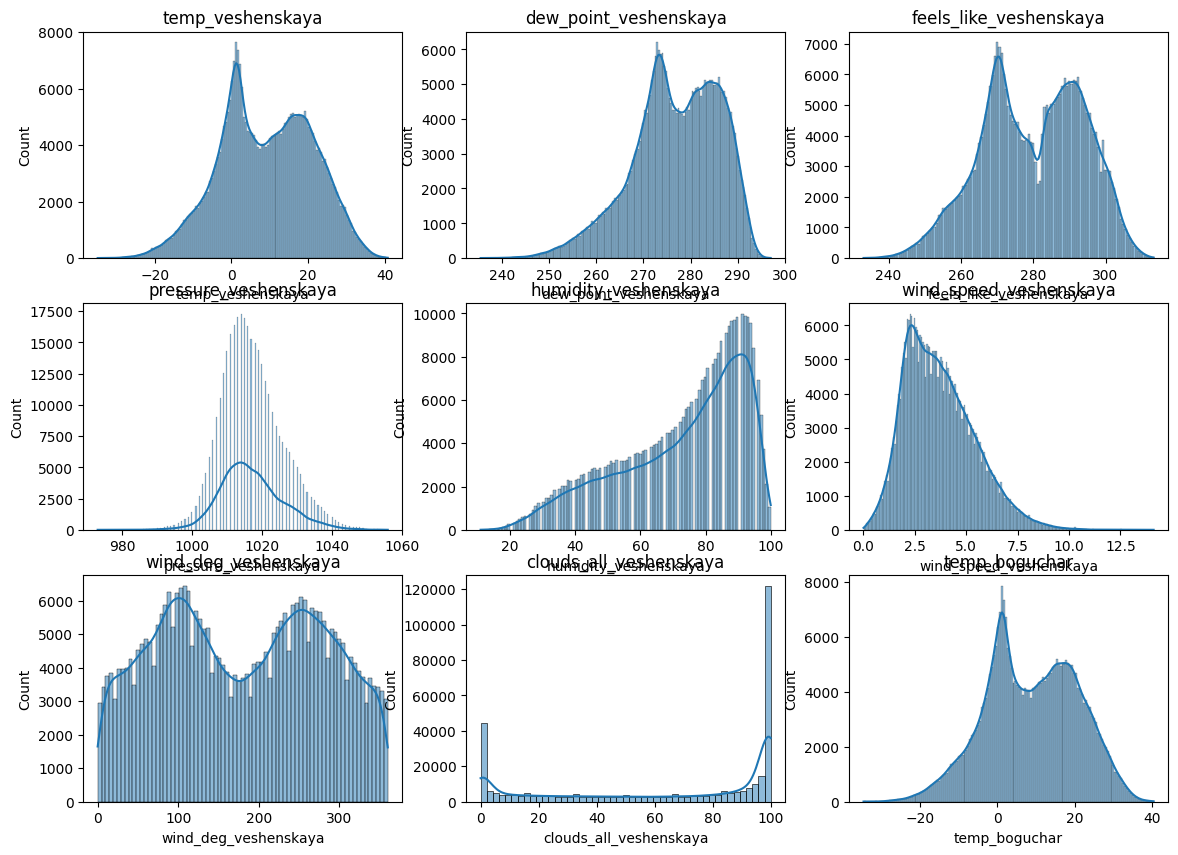

In [ ]:
# Для наглядности — рисуем гистограммы по основным числовым признакам:
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(combined_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

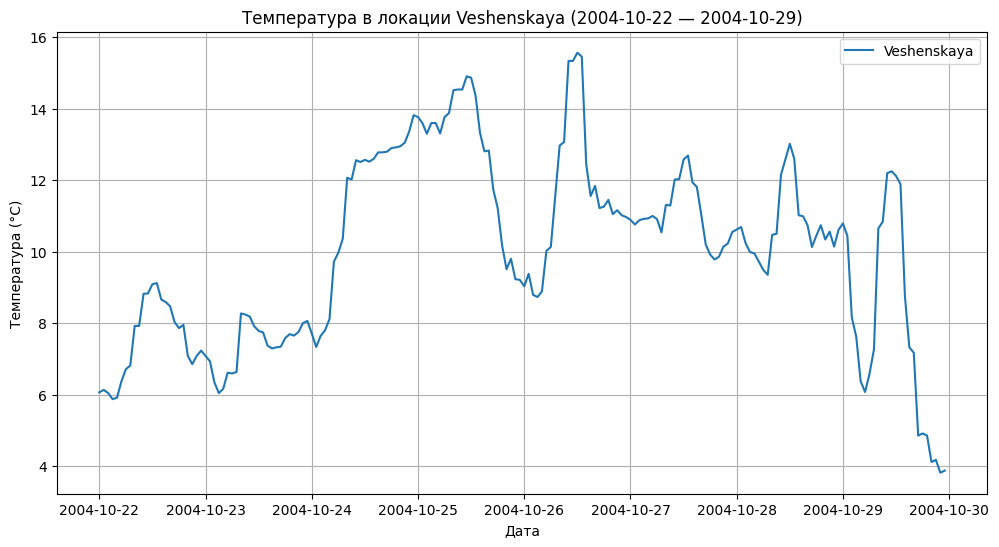

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
#file_path = 'C:\Users\Тимур\Desktop\Agrodigi\unaited_data_wether.csv'
#combined_df = pd.read_csv("C:/Users/Тимур/Desktop/Agrodigi/unaited_data_wether.csv")

# Убедимся, что dt_iso в формате datetime
combined_df['dt_iso'] = pd.to_datetime(combined_df['dt_iso'], errors='coerce')

# Фильтрация данных для диапазона 2004-10-22 — 2004-10-29
start_date = '2004-10-22 00:00:00'
end_date = '2004-10-29 23:59:59'

filtered_df = combined_df[(combined_df['dt_iso'] >= start_date) & (combined_df['dt_iso'] <= end_date)]

# Построение графика температуры для локации veshenskaya
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['dt_iso'], filtered_df['temp_veshenskaya'], label='Veshenskaya')

plt.title("Температура в локации Veshenskaya (2004-10-22 — 2004-10-29)")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
combined_df.shape

(341879, 43)

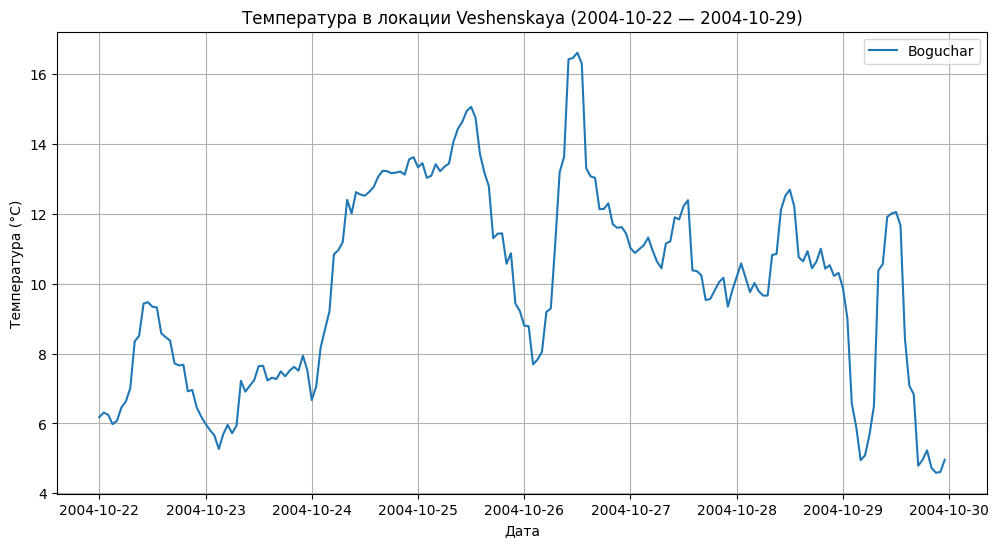

In [ ]:
# Фильтрация данных для диапазона 2004-10-22 — 2004-10-29
start_date = '2004-10-22 00:00:00'
end_date = '2004-10-29 23:59:59'

filtered_df = combined_df[(combined_df['dt_iso'] >= start_date) & (combined_df['dt_iso'] <= end_date)]

# Построение графика температуры для локации veshenskaya
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['dt_iso'], filtered_df['temp_boguchar'], label='Boguchar')

plt.title("Температура в локации Veshenskaya (2004-10-22 — 2004-10-29)")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.legend()
plt.grid()
plt.show()


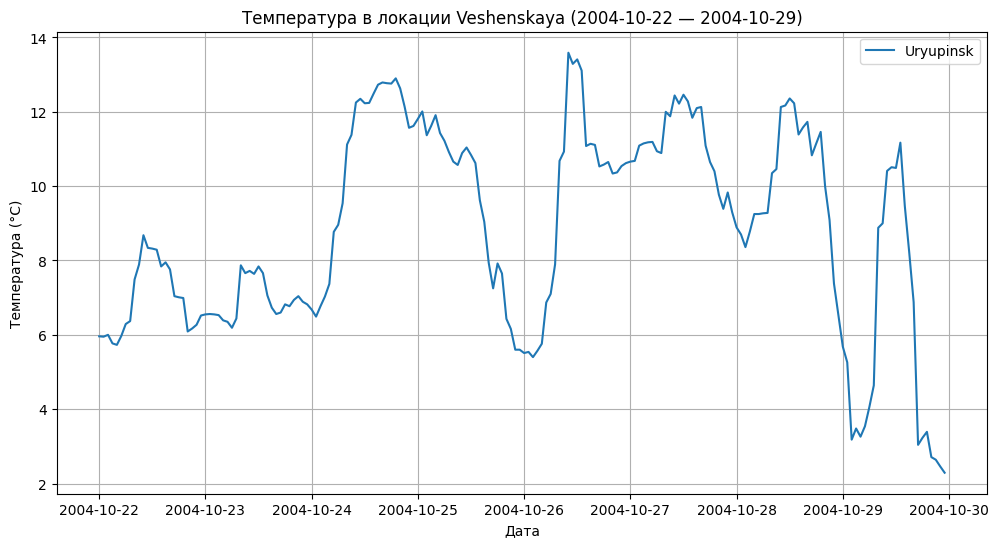

In [ ]:
# Фильтрация данных для диапазона 2004-10-22 — 2004-10-29
start_date = '2004-10-22 00:00:00'
end_date = '2004-10-29 23:59:59'

filtered_df = combined_df[(combined_df['dt_iso'] >= start_date) & (combined_df['dt_iso'] <= end_date)]

# Построение графика температуры для локации veshenskaya
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['dt_iso'], filtered_df['temp_uryupinsk'], label='Uryupinsk')

plt.title("Температура в локации Veshenskaya (2004-10-22 — 2004-10-29)")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Проверка структуры данных
print("Размер данных:", combined_df.shape)
print("Список столбцов:", combined_df.columns.tolist())

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(combined_df.isnull().sum())

# Пример строк
print("\nПример данных:")
print(combined_df.head())


Размер данных: (341879, 41)
Список столбцов: ['dt_iso', 'temp_veshenskaya', 'dew_point_veshenskaya', 'feels_like_veshenskaya', 'pressure_veshenskaya', 'humidity_veshenskaya', 'wind_speed_veshenskaya', 'wind_deg_veshenskaya', 'clouds_all_veshenskaya', 'temp_boguchar', 'dew_point_boguchar', 'feels_like_boguchar', 'pressure_boguchar', 'humidity_boguchar', 'wind_speed_boguchar', 'wind_deg_boguchar', 'clouds_all_boguchar', 'temp_serafimovich', 'dew_point_serafimovich', 'feels_like_serafimovich', 'pressure_serafimovich', 'humidity_serafimovich', 'wind_speed_serafimovich', 'wind_deg_serafimovich', 'clouds_all_serafimovich', 'temp_uryupinsk', 'dew_point_uryupinsk', 'feels_like_uryupinsk', 'pressure_uryupinsk', 'humidity_uryupinsk', 'wind_speed_uryupinsk', 'wind_deg_uryupinsk', 'clouds_all_uryupinsk', 'temp_morozovsk', 'dew_point_morozovsk', 'feels_like_morozovsk', 'pressure_morozovsk', 'humidity_morozovsk', 'wind_speed_morozovsk', 'wind_deg_morozovsk', 'clouds_all_morozovsk']

Пропущенные знач

In [ ]:
combined_df.to_csv('/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/data_for_norm_with_markup.csv')

In [ ]:
combined_df.shape

(341879, 43)

In [ ]:
# --------------------------------------------------------------
# 1. Нормализация данных (MinMaxScaler) с отладкой
# --------------------------------------------------------------
def normalize_data_minmax(df, ignore_cols=None):
    if ignore_cols is None:
        ignore_cols = []

    # Создаём копию, чтобы не изменять исходный df
    df_copy = df.copy()

    # Определяем числовые столбцы
    numerical_cols = [
        col for col in df_copy.columns
        if col not in ignore_cols and pd.api.types.is_numeric_dtype(df_copy[col])
    ]

    # Проверка перед нормализацией
    print(f"До нормализации: Числовые столбцы — {numerical_cols}")
    print(f"Размер данных: {df_copy.shape}")

    # Нормализация
    scaler = MinMaxScaler()
    df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])

    # Проверка после нормализации
    print(f"После нормализации: Размер данных — {df_copy.shape}")

    scaler_params = {
        'min_': scaler.data_min_.tolist(),
        'max_': scaler.data_max_.tolist(),
        'columns': numerical_cols
    }
    return df_copy, scaler, scaler_params

# --------------------------------------------------------------
# 2. Подготовка итогового набора данных с отладкой
# --------------------------------------------------------------
def prepare_data_for_rl(df, categorical_cols, ignore_cols=None):
    if "dt_iso" in df.columns:
        df['dt_iso'] = pd.to_datetime(df['dt_iso'], errors='coerce')

    # Кодируем категориальные данные
    print(f"До кодирования категорий: Размер данных — {df.shape}")
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
    print(f"После кодирования категорий: Размер данных — {df_encoded.shape}")

    # Нормализация
    df_norm, scaler, scaler_params = normalize_data_minmax(df_encoded, ignore_cols=ignore_cols)
    print(f"После нормализации: Размер данных — {df_norm.shape}")
    return df_norm, scaler, scaler_params

# ======================
# ПРИМЕР ИСПОЛЬЗОВАНИЯ
# ======================
if __name__ == "__main__":
    combined_df = pd.read_csv("/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/data_for_norm_with_markup.csv")
    categorical_cols = ["season", "time_of_day"]
    ignore_cols = ["dt_iso"]

    # Диагностика перед началом обработки
    print(f"Изначальный размер данных: {combined_df.shape}")
    print(f"Пропущенные значения перед началом обработки:\n{combined_df.isnull().sum()}")

    # Применение подготовки
    df_prepared, scaler, scaler_params = prepare_data_for_rl(
        df=combined_df,
        categorical_cols=categorical_cols,
        ignore_cols=ignore_cols
    )

    # Проверка финального результата
    print(f"Финальный размер данных: {df_prepared.shape}")
    print(f"Пропущенные значения после обработки:\n{df_prepared.isnull().sum()}")


Изначальный размер данных: (341879, 44)
Пропущенные значения перед началом обработки:
Unnamed: 0                 0
dt_iso                     0
temp_veshenskaya           0
dew_point_veshenskaya      0
feels_like_veshenskaya     0
pressure_veshenskaya       0
humidity_veshenskaya       0
wind_speed_veshenskaya     0
wind_deg_veshenskaya       0
clouds_all_veshenskaya     0
temp_boguchar              0
dew_point_boguchar         0
feels_like_boguchar        0
pressure_boguchar          0
humidity_boguchar          0
wind_speed_boguchar        0
wind_deg_boguchar          0
clouds_all_boguchar        0
temp_serafimovich          0
dew_point_serafimovich     0
feels_like_serafimovich    0
pressure_serafimovich      0
humidity_serafimovich      0
wind_speed_serafimovich    0
wind_deg_serafimovich      0
clouds_all_serafimovich    0
temp_uryupinsk             0
dew_point_uryupinsk        0
feels_like_uryupinsk       0
pressure_uryupinsk         0
humidity_uryupinsk         0
wind_speed_uryu

In [ ]:
df_prepared.shape

(341879, 50)

In [ ]:
# Проверка типа столбца dt_iso
if "dt_iso" in df_prepared.columns:
        print("\nТип данных столбца dt_iso:", df_prepared['dt_iso'].dtype)
        print("Пример значений dt_iso:", df_prepared['dt_iso'].head())



Тип данных столбца dt_iso: datetime64[ns]
Пример значений dt_iso: 0   1985-01-01 01:00:00
1   1985-01-01 02:00:00
2   1985-01-01 03:00:00
3   1985-01-01 04:00:00
4   1985-01-01 05:00:00
Name: dt_iso, dtype: datetime64[ns]


In [ ]:
df_prepared.columns

Index(['Unnamed: 0', 'dt_iso', 'temp_veshenskaya', 'dew_point_veshenskaya',
       'feels_like_veshenskaya', 'pressure_veshenskaya',
       'humidity_veshenskaya', 'wind_speed_veshenskaya',
       'wind_deg_veshenskaya', 'clouds_all_veshenskaya', 'temp_boguchar',
       'dew_point_boguchar', 'feels_like_boguchar', 'pressure_boguchar',
       'humidity_boguchar', 'wind_speed_boguchar', 'wind_deg_boguchar',
       'clouds_all_boguchar', 'temp_serafimovich', 'dew_point_serafimovich',
       'feels_like_serafimovich', 'pressure_serafimovich',
       'humidity_serafimovich', 'wind_speed_serafimovich',
       'wind_deg_serafimovich', 'clouds_all_serafimovich', 'temp_uryupinsk',
       'dew_point_uryupinsk', 'feels_like_uryupinsk', 'pressure_uryupinsk',
       'humidity_uryupinsk', 'wind_speed_uryupinsk', 'wind_deg_uryupinsk',
       'clouds_all_uryupinsk', 'temp_morozovsk', 'dew_point_morozovsk',
       'feels_like_morozovsk', 'pressure_morozovsk', 'humidity_morozovsk',
       'wind_speed_mo

In [ ]:
# Удаление лишних столбцов
df_final = df_prepared.drop(columns=['Unnamed: 0'], errors='ignore')



In [ ]:
# Сохранение данных
output_path = '/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/final_data_for_rl.csv'
df_final.to_csv(output_path, index=False)

print(f"Финальный DataFrame сохранён в {output_path}")
print("Размер итогового набора данных:", df_final.shape)
print("Список столбцов:", df_final.columns.tolist())


Финальный DataFrame сохранён в /content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/final_data_for_rl.csv
Размер итогового набора данных: (341879, 49)
Список столбцов: ['dt_iso', 'temp_veshenskaya', 'dew_point_veshenskaya', 'feels_like_veshenskaya', 'pressure_veshenskaya', 'humidity_veshenskaya', 'wind_speed_veshenskaya', 'wind_deg_veshenskaya', 'clouds_all_veshenskaya', 'temp_boguchar', 'dew_point_boguchar', 'feels_like_boguchar', 'pressure_boguchar', 'humidity_boguchar', 'wind_speed_boguchar', 'wind_deg_boguchar', 'clouds_all_boguchar', 'temp_serafimovich', 'dew_point_serafimovich', 'feels_like_serafimovich', 'pressure_serafimovich', 'humidity_serafimovich', 'wind_speed_serafimovich', 'wind_deg_serafimovich', 'clouds_all_serafimovich', 'temp_uryupinsk', 'dew_point_uryupinsk', 'feels_like_uryupinsk', 'pressure_uryupinsk', 'humidity_uryupinsk', 'wind_speed_uryupinsk', 'wind_deg_uryupinsk', 'clouds_all_uryupinsk', 'temp_morozovsk', 'dew_point_morozovsk', 'feels_like_morozovsk', 'pressure

In [ ]:
import json

# Сохранение параметров скейлера для обратного преобразования
scaler_params_path = '/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/scaler_params.json'
with open(scaler_params_path, 'w') as f:
    json.dump(scaler_params, f)

print(f"Параметры скейлера сохранены в {scaler_params_path}")


Параметры скейлера сохранены в /content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/scaler_params.json


Сохранение параметров скейлера для обратного преобразования
Сохранение данных '/content/drive/MyDrive/RL_AgroDigi/clear_data_to_RL/final_data_for_rl.csv'